# Problem 4.2


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats, optimize
import scipy


## Country data

- Determine the mean, median, 25%, and 75% quantiles of the GDP

This is quite straight forward when using numpy functions. One interesting thing to notice for this distribution is the difference between the mean of the GDP and the 50% quantile. By plotting the data in a histogram we notice that the data has a heavy tail that causes this discreptancy

If we not want to use builtin numpy methods, we can also do it our self. One important thing to remember using this method is to sort the data beforehand, otherwise the method does not work

17362.045112781954 2047.0 6677.0 23762.0


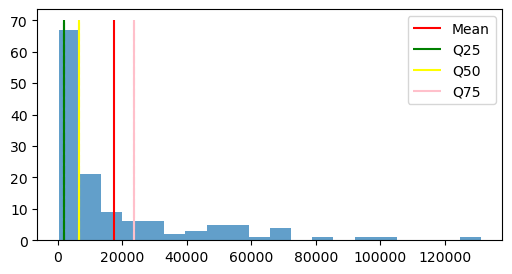

17362.045112781954 2047.0 6677.0 23762.0


In [23]:
# Load data and label it acording to header
data = np.genfromtxt('data_CountryScores.txt', delimiter = ',', skip_header = 1)
Country = data[:,0]
GDP = data[:,1]
PopSize = data[:,2]
Happines = data[:,3]
EconFreedom = data[:,4]
PressFreedom = data[:,5]
Education = data[:,6]

#Calculating mean
Mean_gdp = np.mean(GDP)

#Quantiles using numpy
q25 = np.quantile(GDP, .25)
q50 = np.quantile(GDP, .50)
q75 = np.quantile(GDP, .75)

print(Mean_gdp, q25, q50, q75)

fig, ax = plt.subplots(1,1,figsize = (6,3))

ax.hist(GDP, bins = 20, alpha = .7);
ax.vlines(Mean_gdp, 0, 70, color = 'red')
ax.vlines(q25, 0, 70, color = 'green')
ax.vlines(q50, 0, 70, color = 'yellow')
ax.vlines(q75, 0, 70, color = 'pink')
ax.legend(['Mean', 'Q25', 'Q50', 'Q75'])

# Quantiles using a custom method
GDP_sorted = np.sort(GDP)
Q25 = GDP_sorted[int(25*len(GDP)/100)]
Q50 = GDP_sorted[int(50*len(GDP)/100)]
Q75 = GDP_sorted[int(75*len(GDP)/100)]
ax.vlines(Q25, 0, 70, ls = '--', color = 'green')
ax.vlines(Q50, 0, 70, ls = '--', color = 'yellow')
ax.vlines(Q75, 0, 70, ls = '--', color = 'pink')
plt.show()
print(Mean_gdp, Q25, Q50, Q75)



- Does the distribution of $log_{10} (P opSize)$ follow a Gaussian distribution

The distribution of log10(P opSize) was sorted into 50 bins in the range [4.5,9.5] and is shown in the figure below

The distribution was fitted to a scaled Gaussian with N as a fitting parameter, using the χ2 method, in
order to obtain a p-value describing the probability of the distribution being Gaussian. This gives a reasonable
χ2 = 41, which for 28 degrees of freedom gives p = 0.057. However, the fit contains low statistics, and χ2 is
thus not an appropriate choice of method for fitting the data. Additionally, for the χ2 method, Poisson errors
are assumed, which is only a safe assumption for high bin counts. The bin counts in the figure above are
though very low.
For these reasons, the fit is repeated using the unbinned likelihood method, as it does not suffer from the
same shortcomings. The fit in shown in figure 24, along side the binned distribution.
This fit visibly differs from the χ2 fit, supporting the fact that that the χ2 method was a poor choice.
The fitting parameters have changed, in particular the standard deviation of the fitted function, which is
now significantly lower. Additionally, the errors on the fitting parameters are orders of magnitude smaller
indicating that Poisson errors were a poor estimate.
The disadvantage of the likelihood method is that it does not return a p-value directly, only a likelihood value
which does not follow a set distribution. To obtain a p-value, the distribution can be compared to the fitted
Gaussian function, using a one sample Kolmogorov-Smirnov test, which gives a probability of the distribution
following the fitted function. This can be done using scipy’s stats.kstest() function. Doing so gives
p = scipy.stats.kstest(log10(P opsize), PGauss(x; μ = 6.96, σ = 0.67)) = 0.367 (46)
The probability of the log10(P opsize) distribution being Gaussianly distributed according to the fitted function
is thus roughly 37%, which indicates that the distribution does follow a Gaussian distribution.
A null hypothesis can however never be proven true, and this is thus not proof that it follows a Gaussian
distribution; we can only say that it does not deviate significantly enough that we can exclude the possibility.

[ 4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5  5.7  5.9  6.1  6.3  6.5  6.7
  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9  9.1  9.3  9.5
  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1 11.3 11.5 11.7]


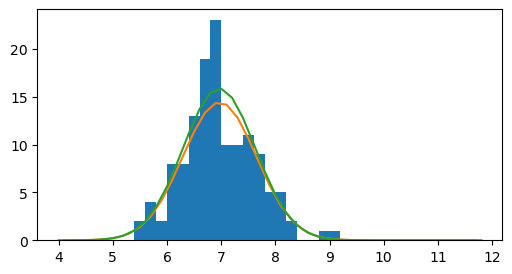

In [24]:
log_pop = np.log10(PopSize)

def gaussian(x, mu, sigma, N):
    return N*.2*stats.norm.pdf(x, loc = mu, scale = sigma)

def gaussian_ULH(x,mu,sigma):
    return stats.norm.pdf(x, loc = mu, scale = sigma)
bins = np.arange(4,12, .2)
count, BINS = np.histogram(log_pop, bins = bins)
bin_center = (BINS[1:] + BINS[:-1])/2
count_err = np.sqrt(count)
print(bin_center)


fig, ax = plt.subplots(1,1, figsize = (6,3))
ax.hist(log_pop, bins = bins)


chi2_fit = cost.LeastSquares( bin_center[count > 0], count[count > 0], count_err[count > 0], gaussian) 
minuit_chi2 = Minuit(chi2_fit, 6.8, .8, len(log_pop))
minuit_chi2.errordef = 1
minuit_chi2.migrad()

ax.plot(bin_center, gaussian(bin_center, *minuit_chi2.values[:]))

ulh_fit = cost.UnbinnedNLL(log_pop, gaussian_ULH)
ulh_minuit = Minuit(ulh_fit, mu = 6.8, sigma = .8)
ulh_minuit.errordef = .5
ulh_minuit.migrad()

ax.plot(bins, .2*len(log_pop)*gaussian_ULH(bins, *ulh_minuit.values[:]))




In [25]:
# Anderson Darling test

print(stats.anderson(log_pop, dist = 'norm'))

print(stats.kstest(log_pop, 'norm'))

AndersonResult(statistic=np.float64(0.5203538631359379), critical_values=array([0.56 , 0.638, 0.765, 0.892, 1.062]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(6.962459470845413), scale=np.float64(0.670902746509409))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
KstestResult(statistic=np.float64(0.999999967873091), pvalue=np.float64(0.0), statistic_location=np.float64(5.4065401804339555), statistic_sign=np.int8(-1))


- What are the Pearson and Spearman correlations between happiness and education indeces

  First we plot the data and spot that the data looks correlated. Next we compute the pearson correlation using this formula
  $$\rho = \frac{V_{xy}}{\sigma_x\sigma_y} $$
  Here $V_{xy}$ is the covariance

  There are probably a milion packages that could do the job, but instead we devise our own function for two variables and get the pearson correlation as
  $\rho = .76$
This again confirms our belief that the data is correlated

Next we compute the spearman rank. This method looks at how sorted two sets of variables are relative to one another. Again there are many packages out there, below we make out own implementation
Using this we get a spearman correlation of
$$\rho = .83$$


0.7647440306793956
0.8362391732383877


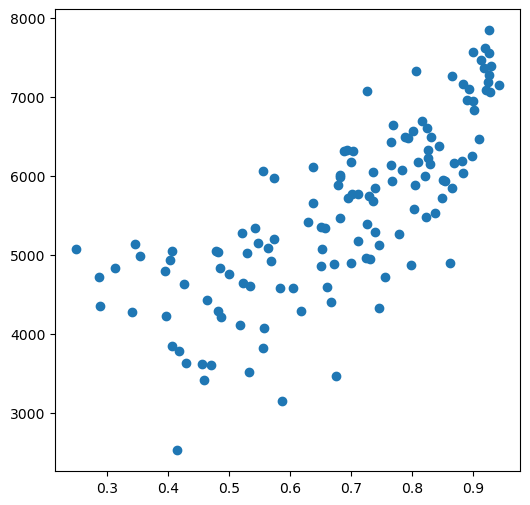

In [26]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.scatter(Education, Happines)


def spearman(var1, var2):
    sig_1 = np.std(var1)
    sig_2 = np.std(var2)
    mean1 = np.mean(var1)
    mean2 = np.mean(var2)
    covariance = 1/len(var1) * np.sum((var1 - mean1)*(var2 - mean2))
    return covariance / (sig_1 * sig_2)

print(spearman(Education, Happines))

def rank(var1, var2):
    n = len(var1) # The length of both variables should be the same
    key1 = np.argsort(var1) # find the rank for each of the variables. Ie label the the lowest value 0 and the highest value n
    key2 = np.argsort(var2)
    return 1 - np.sum((key1 - key2)**2 / (n**3 - n))

print(rank(Education, Happines))
    


- Plot the Happiness-Index as a function of GDP, and fit the relation between the two. From this fit,
what would you estimate the uncertainty to be on the Happiness-index?

As for all fits, we start by plotting the data as shown in the left plot below. From here we quickly spot a logarithmic trend, that we further investigate by changing the scale of the first axis to a log10 axis as seen on the right plot below. Looking at this plot, it looks like there is a nice linear trend we can fit the function to, thus our final fundtion becomes
$$f(GDP) = a_0 + a_1 log_{10}(GDP)$$

Now we are tasked with fitting, and there is in general three methods we could use

-Chi2. We dont have any errors given for this data set, so in order for this to work we would need to make up an error. This is fine in some cases but we would need later down the line to argue if this choice is good or not. This Method is likewise prone to overfitting our data. I wont do it in the code below as there are other examples on how to fit using a Chi2 method, where the method is better suited.

- Least squares, most simple method but does not give back a goodness of fit nor an uncertaity of the variables. To get an uncertaity of the measurement we would instead look at the residuals of the resulting fit. If the fit is good, we should get out a gaussian distribution, and by fitting this we get out the uncertainty on the second variable as the standard deviation of the gaussian fit. We can fit the gaussian with many methods, but below I've chosen the unibinned likelihood, as this would be better in cases where the amount of data points are limited

- Lastly we can also use the unbinned likelihood in itself to fit, we just need to change the method slightly from when we normally fit using this method. Here we dont directly fit the function, we instead fit the resisuals that the function generates. The method is much like the one from before, but now we change $a_0$ and $a_1$ to get a better gaussian fit for our residuals. This method is great as it provides us with uncertainties on the paramereters, as well as allowing us to evaluate different fits up againt one another if we wanted.

We use both methods and plot the resulting fit upon the data and see that there is very little difference between the two, as we also would expect from a simple linear fit. The two are so familiar that we can tell them appart on the plot. 
Looking at the the fit to the residual we spot that the $\sigma_y = 587 \pm 35$

[-1.8018936384749367e-12, 587.1720749912306]
587.1720749912306
[48.36310301830212, 1437.073141660211, 587.1494795788725]
48.35699409876071 1437.0744044165158
[305.4615821591206, 78.75598478960855, 35.99832532529485]


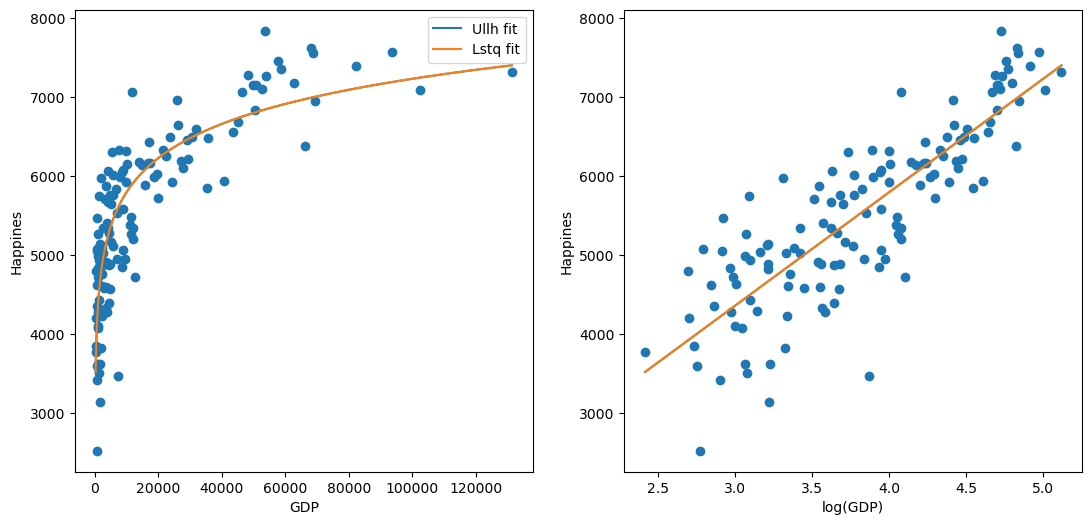

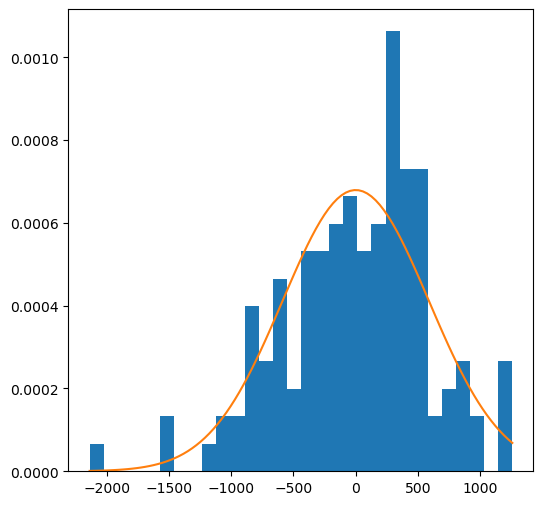

In [32]:
log_gdp = np.log10(GDP)

def fit_pdf_llh(x, a0, a1,sigma):
    y = Happines - (a0 + a1*x) #calculate the residuals
    return (1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (y)**2 / sigma**2))

def fit_gauss(x, mu, sigma):
    return stats.norm.pdf(x, loc = mu, scale = sigma)

# Simlple Lstq fit of the data
A = np.vstack([log_gdp, np.ones_like(log_gdp)])
a1, a0 = np.linalg.lstsq(A.T, Happines, rcond=None)[0]

residuals = Happines - (a0 + a1*log_gdp)

# Fit the residuals using unbinned most likelihood method, chi2 would also be fine for most cases, ULLH is more robust when N is low
ullh_lstq = cost.UnbinnedNLL( residuals, fit_gauss)
minuit_lstq = Minuit(ullh_lstq, mu = residuals.mean(), sigma = residuals.std())
minuit_lstq.migrad()
print(minuit_lstq.values[:])
print(residuals.std())



# MLE hack to fit the residual of the function instead of the function.
ullh_fit = cost.UnbinnedNLL( log_gdp, fit_pdf_llh)
minuit = Minuit(ullh_fit, a0 = a0, a1 = a1, sigma = 1)
minuit.errordef = 1
minuit.migrad()


# plot some things
fig, ax =  plt.subplots(1,2, figsize = (13,6))

ax[0].scatter(GDP, Happines)
ax[0].set(xlabel = 'GDP', ylabel = 'Happines')

ax[1].scatter(log_gdp, Happines)
ax[1].set(xlabel = 'log(GDP)', ylabel = 'Happines')
xrange = np.linspace(log_gdp.min(), log_gdp.max(), 1000)

ax[1].plot(xrange, minuit.values['a0'] + minuit.values['a1']*xrange)
ax[1].plot(xrange, a0 + a1*xrange)

xrange = np.linspace(GDP.min(), GDP.max(), 1000)

ax[0].plot(xrange, minuit.values['a0'] + minuit.values['a1']*np.log10(xrange), label = 'Ullh fit')
ax[0].plot(xrange, a0 + a1 * np.log10(xrange), label = 'Lstq fit')
ax[0].legend()

print(minuit.values[:])
print(a0, a1)
print(minuit.errors[:])




fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.hist(residuals, bins = 30, density = 'True')
res_range = np.linspace(residuals.min(), residuals.max(), 100)
ax.plot(res_range, fit_gauss(res_range, *minuit_lstq.values[:]))

